# Q1

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
import warnings
warnings.filterwarnings("ignore")
# warnings.filterwarnings("ignore", module = "Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.") # "Matplotlib\..*" )


In [66]:
df = pd.read_csv("HISP.csv")
print(df.shape)
print(df.isna().sum().sum())

(19827, 24)
0


In [67]:
df = df.loc[df["round"] == "Before"]
df.head()

,locality_identifier,household_identifier,treatment_locality,promotion_locality,eligible,enrolled,enrolled_rp,poverty_index,round,health_expenditures,...,female_hh,indigenous,hhsize,dirtfloor,bathroom,land,hospital_distance,enrolled_num,sports,park
0,26,5,Treatment,Promotion,Eligible,Enrolled,1,55.950542,Before,15.185455,...,0,0,4,1,0,1,124.819966,1,8,0.771
2,26,11,Treatment,Promotion,Eligible,Enrolled,0,46.058731,Before,13.076257,...,0,0,6,1,0,2,124.819966,1,3,3.012
5,26,13,Treatment,Promotion,Eligible,Enrolled,0,54.095825,Before,15.286353,...,0,0,6,1,0,4,124.819966,1,6,2.289
7,26,16,Treatment,Promotion,Eligible,Enrolled,1,56.903400,Before,11.311761,...,0,0,7,1,0,2,124.819966,1,2,4.638
8,26,21,Treatment,Promotion,Eligible,Enrolled,1,46.908810,Before,11.223912,...,0,0,7,1,0,2,124.819966,1,1,3.623


# Define label_names / features_names, and continuous_features_names / discrete_features_names

In [68]:
label_name = ["health_expenditures"]
features_names = ["poverty_index", "age_hh", "age_sp", "educ_hh", "educ_sp", "female_hh", "indigenous", "hhsize", "dirtfloor", "bathroom", "land", "hospital_distance", "park", "sports"]
df = df.loc[:, label_name+features_names]
df.shape

(9913, 15)

In [69]:
df.describe()

,health_expenditures,poverty_index,age_hh,age_sp,educ_hh,educ_sp,female_hh,indigenous,hhsize,dirtfloor,bathroom,land,hospital_distance,park,sports
count,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000
mean,17.210985,56.790404,46.200353,40.183900,2.833289,2.617573,0.099062,0.352870,5.178553,0.603652,0.615959,2.079492,105.319595,2.518121,5.524362
std,5.588098,10.685997,15.285329,12.794188,2.754699,2.543095,0.298760,0.477887,2.195223,0.489163,0.486392,3.133165,42.063589,1.437306,2.870390
min,6.252154,20.479134,14.000000,14.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,9.465392,0.001000,1.000000
25%,13.021940,49.652241,34.000000,30.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,72.804218,1.278000,3.000000
50%,16.839489,56.414219,45.000000,41.000000,2.000000,2.000000,0.000000,0.000000,5.000000,1.000000,1.000000,1.000000,113.556497,2.541000,6.000000
75%,21.053459,62.905720,57.000000,47.000000,4.000000,4.000000,0.000000,1.000000,7.000000,1.000000,1.000000,3.000000,141.097735,3.749000,8.000000
max,35.626358,100.000000,88.000000,87.000000,16.000000,17.000000,1.000000,1.000000,13.000000,1.000000,1.000000,23.000000,170.457647,5.008000,10.000000


In [70]:
continuous_features_names = ["age_hh", "age_sp", "educ_hh", "educ_sp", "hhsize", "hospital_distance", "land", "park", "poverty_index", "sports"]
discrete_features_names = ["bathroom", "dirtfloor", "female_hh", "indigenous"]

# Histograms to see repartition of data

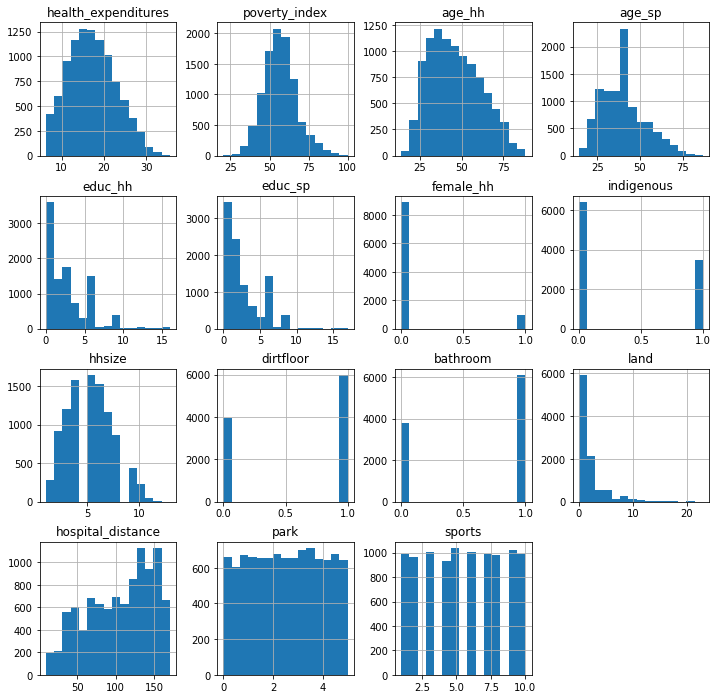

In [71]:
df.hist(figsize=(12, 12), bins=15); # , legend=True

In [72]:
# We observe that features "park" and "sports" how low variances so they will probably don't have a significant impact on the predictions.

# Plots to find insights/ideas

## Scatter plots : Target - feature

In [73]:
# There are 14 features
import random
random.seed(5)
random_indexes = random.sample(range(len(df)), 500) # 100
random_indexes.sort()

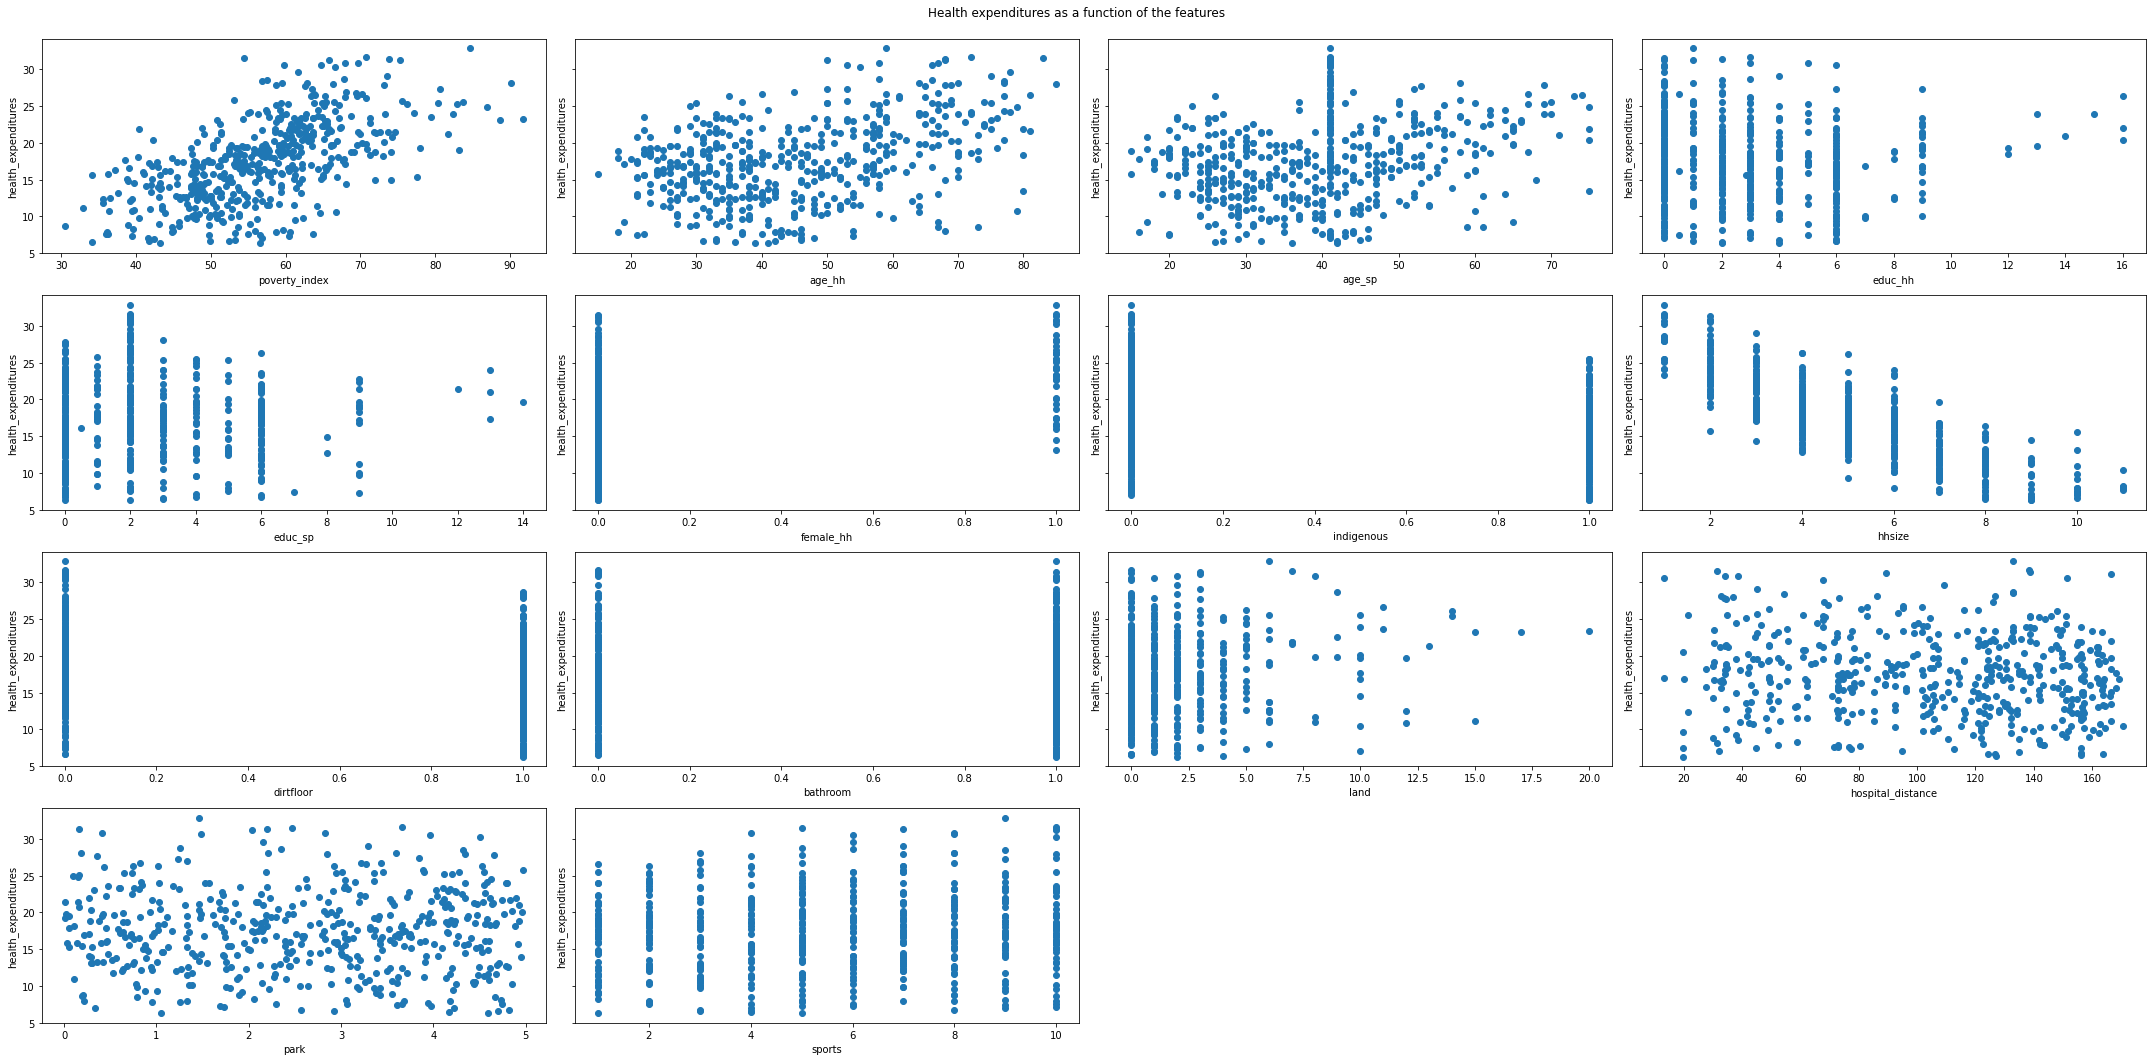

In [74]:
fig, axes = plt.subplots(4, 4, sharey=True, figsize=(30, 15))
fig.delaxes(axes[3, 2])
fig.delaxes(axes[3, 3])

for ax, feature_name in zip(axes.flat, features_names):
    # ax.scatter(df[feature_name], df["health_expenditures"])
    ax.scatter(df.loc[df.index[random_indexes], feature_name], df.loc[df.index[random_indexes], "health_expenditures"])
    ax.set_xlabel(feature_name)
    ax.set_ylabel("health_expenditures")

fig.suptitle("Health expenditures as a function of the features")
fig.tight_layout()
fig.subplots_adjust(top=0.95)
fig.show()

## Boxplots : Target - feature

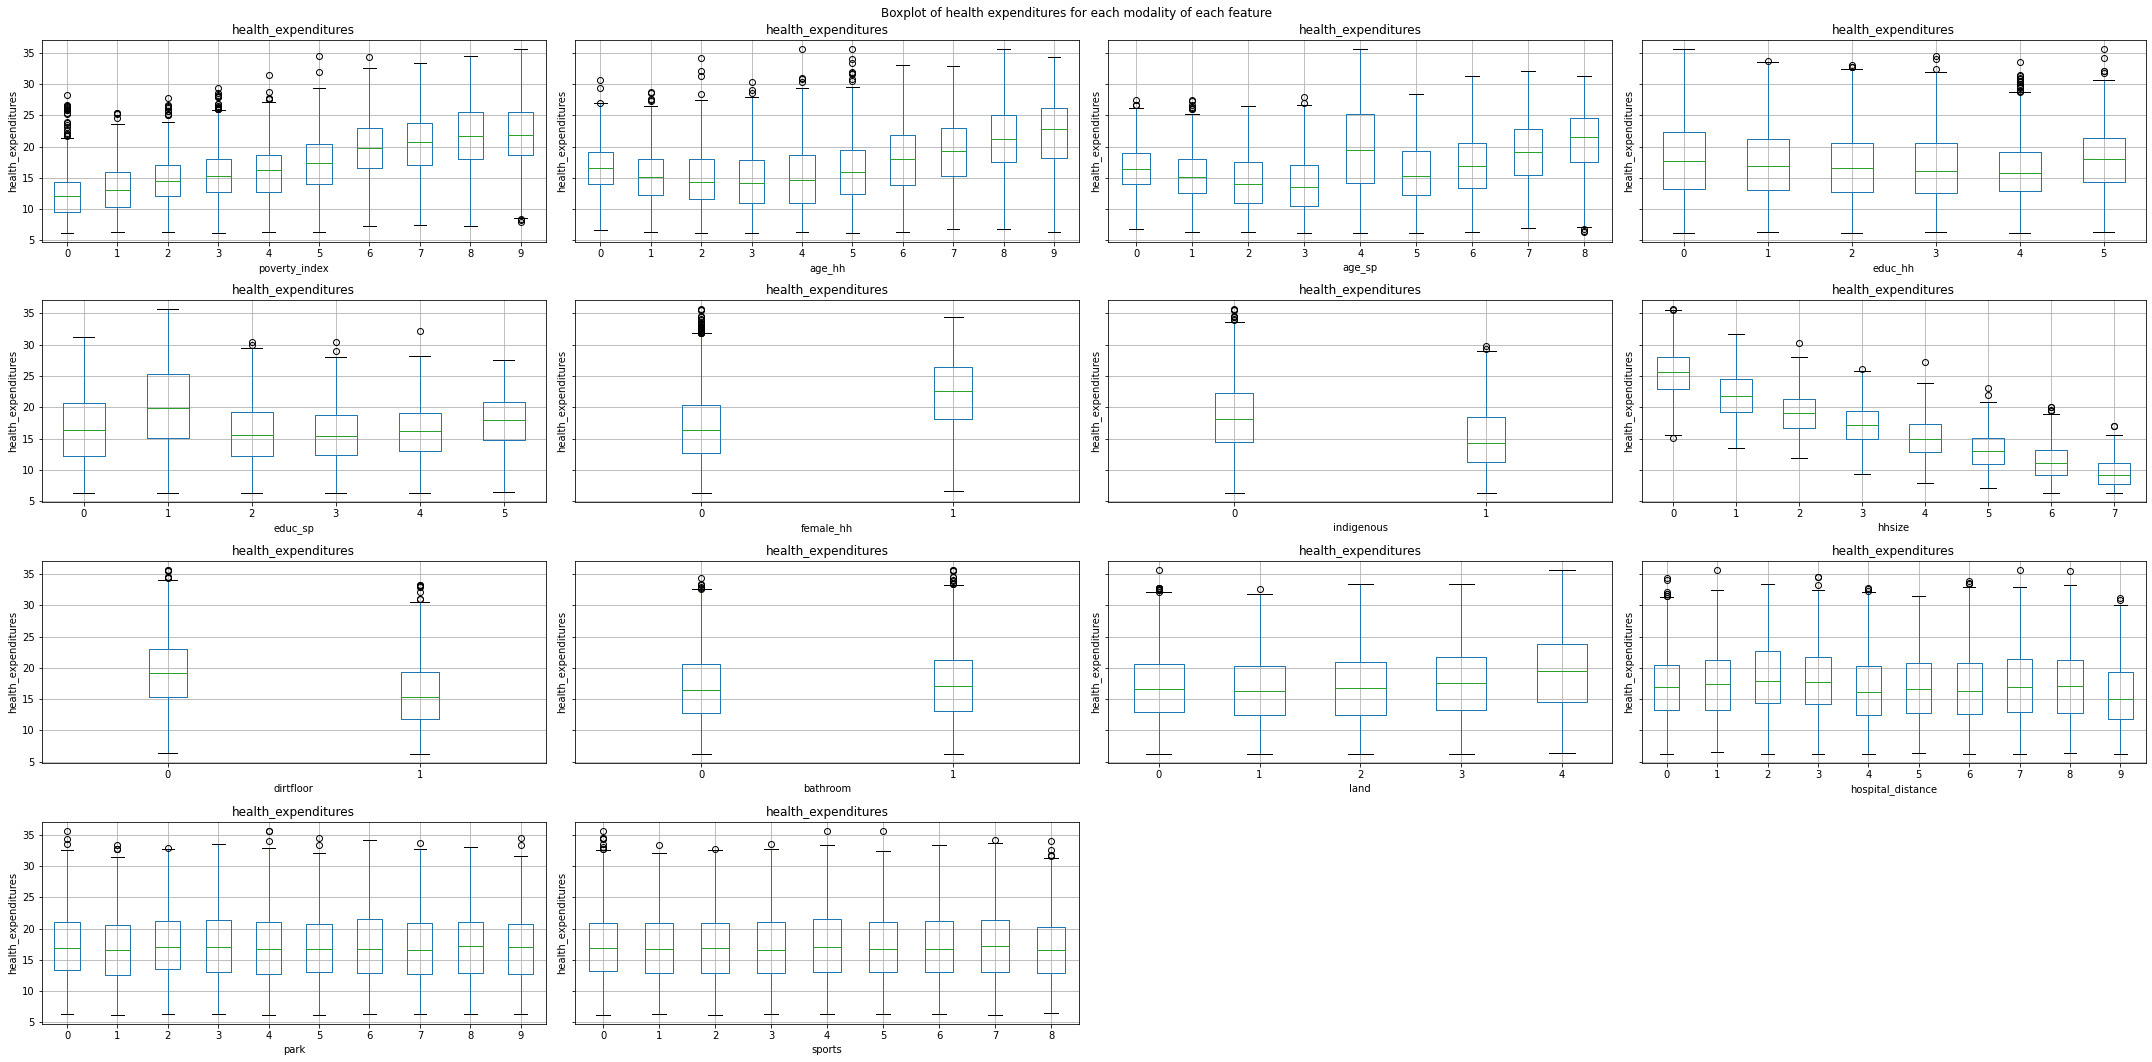

In [75]:
fig, axes = plt.subplots(4, 4, sharey=True, figsize=(30, 15))
fig.delaxes(axes[3, 2])
fig.delaxes(axes[3, 3])

q = 10

for ax, feature_name in zip(axes.flat, features_names):
    if feature_name in continuous_features_names:
        # df[f"{feature_name}_discretized"] = pd.qcut(df[feature_name], q=q)
        # df[f"{feature_name}_discretized"] = pd.qcut(df[feature_name], q=q, retbins=False, duplicates="drop")

        bins = pd.qcut(df[feature_name], q=q, retbins=True, duplicates="drop")
        len_bins = len(bins[1])
        df[f"{feature_name}_discretized"] = pd.qcut(df[feature_name], q=q, labels=range(len_bins-1), retbins=False, duplicates="drop")

        # df[f"{feature_name}_discretized"] = pd.cut(df[feature_name], bins=q, labels=range(q))
        
        df.boxplot(column="health_expenditures", by=f"{feature_name}_discretized", ax=ax)
        df.drop(f"{feature_name}_discretized", axis=1, inplace=True)
    else:
        df.boxplot(column="health_expenditures", by=feature_name, ax=ax)

    ax.set_xlabel(feature_name)
    ax.set_ylabel("health_expenditures")

fig.suptitle("Boxplot of health expenditures for each modality of each feature")
fig.tight_layout()
fig.subplots_adjust(top=0.95)
fig.show()

In [76]:
# We observe for example that the features poverty_index is positively corrolated to health_expenditures. This observation seem reasonnable: when the poverty_index increases, 
# people are wealthiest so they can spend more in healthcare.
# On the contrary, we observe for example that the features hhsize and dirthfloor are negatively corrolated to health_expenditures. These observations seem reasonnable: 
# each household has a fixed budget for health expenditures so when the number of household members is high, each member has a lower health expenditures. 
# When the home of the household has a dirt floor, we guess that the household has a lower income and therefore lower health expenditures per person. 

# Q2

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[features_names], df[label_name], test_size=0.2, random_state=42)
X_train.sort_index(inplace=True)
X_test.sort_index(inplace=True)
y_train.sort_index(inplace=True)
y_test.sort_index(inplace=True)

X_train.head()

,poverty_index,age_hh,age_sp,educ_hh,educ_sp,female_hh,indigenous,hhsize,dirtfloor,bathroom,land,hospital_distance,park,sports
2,46.058731,30.0,26,4.0,0.0,0,0,6,1,0,2,124.819966,3.012,3
5,54.095825,58.0,56,0.0,0.0,0,0,6,1,0,4,124.819966,2.289,6
8,46.908810,37.0,35,0.0,0.0,0,0,7,1,0,2,124.819966,3.623,1
10,48.183926,34.0,41,0.0,2.0,1,0,9,1,0,1,124.819966,1.199,7
13,49.690880,30.0,29,0.0,6.0,0,0,7,0,0,1,124.819966,4.898,5


# Q3

## a

In [78]:
# There is no categorical variables so we don't need one hot encoding
# We have to normalize our data ie to center and to scale it : 
# (X - X.mean()) / X.std()

In [79]:
X_train[continuous_features_names], X_test[continuous_features_names] = (X_train[continuous_features_names] - X_train[continuous_features_names].mean()) / X_train[continuous_features_names].std(), (X_test[continuous_features_names] - X_test[continuous_features_names].mean()) / X_test[continuous_features_names].std()
y_train, y_test = (y_train - y_train.mean()) / y_train.std(), (y_test - y_test.mean()) / y_test.std()

X_train.head()
# y_train.head()
# print(X_train.var(), y_train.var())

,poverty_index,age_hh,age_sp,educ_hh,educ_sp,female_hh,indigenous,hhsize,dirtfloor,bathroom,land,hospital_distance,park,sports
2,-1.000737,-1.063310,-1.107875,0.419040,-1.032854,0,0,0.365339,1,0,-0.023710,0.46693,0.347889,-0.869699
5,-0.249577,0.774165,1.233559,-1.026551,-1.032854,0,0,0.365339,1,0,0.615816,0.46693,-0.154681,0.174941
8,-0.921287,-0.603941,-0.405445,-1.026551,-1.032854,0,0,0.820436,1,0,-0.023710,0.46693,0.772607,-1.566126
10,-0.802113,-0.800813,0.062842,-1.026551,-0.241384,1,0,1.730628,1,0,-0.343473,0.46693,-0.912360,0.523154
13,-0.661270,-1.063310,-0.873732,-1.026551,1.341558,0,0,0.820436,0,0,-0.343473,0.46693,1.658883,-0.173272


In [80]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(fit_intercept=True).fit(X_train, y_train)

In [81]:
y_pred_lin_reg = lin_reg.predict(X_test)
# y_pred_train_lin_reg = lin_reg.predict(X_train)
# y_pred_lin_reg.shape

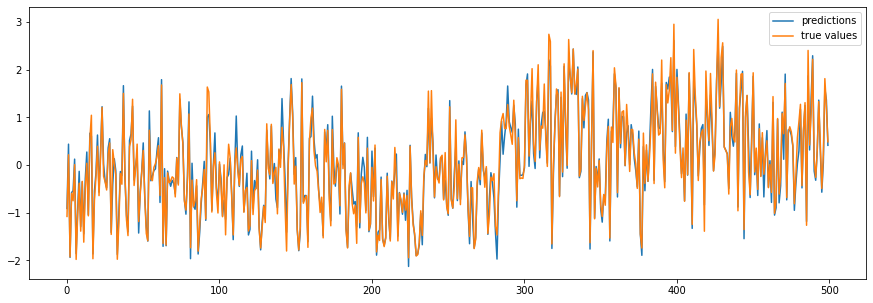

In [82]:
random.seed(5)
random_samples = random.sample(range(len(X_test)), 500)
random_samples.sort()

plt.figure(figsize=(15,5))
plt.plot(y_pred_lin_reg[random_samples], label="predictions")
plt.plot(y_test.values[random_samples], label="true values")
plt.legend()
plt.show()

In [83]:
# print(y_test["health_expenditures"].var())
# print(np.var(y_pred_lin_reg))

## b

In [84]:
def rmse(y_test, y_pred_lin_reg):
    return np.sqrt(np.mean((y_test-y_pred_lin_reg)**2))

In [85]:
print(f"RMSE on the train set : {rmse(y_train.values, lin_reg.predict(X_train))}")
print(f"RMSE on the test set : {rmse(y_test.values, y_pred_lin_reg)}")

RMSE on the train set : 0.19127944852042927
RMSE on the test set : 0.1951727085970667


In [86]:
# The RMSE is lower for the predictions on the train set which is normal as the model has already seen this data

In [87]:
# I suggest to make cross validation

## c

In [88]:
results_lin_reg = pd.DataFrame({"coef": np.hstack((lin_reg.intercept_, lin_reg.coef_.flatten())), "features": np.hstack(("intercept", X_train.columns))}).sort_values(by="coef", ascending=False).set_index("features")
results_lin_reg

,coef
features,
intercept,0.376404
female_hh,0.294870
age_hh,0.186257
land,0.106230
poverty_index,0.099259
educ_hh,0.078532
bathroom,0.069884
age_sp,0.027941
hospital_distance,0.004329


## d

In [89]:
# Variables for which the coef is very close to 0 ie :
# hospital_distance, sports, park 

In [90]:
# Lasso regularization allows the coefficients of variables with little impact on the target variable to be set to 0

# 4

## a

In [91]:
# We have to normalize our data ie to center and scale it

In [92]:
# I choose to use Random forests (I have tried Decision Trees and SVM in the Appendix)

### Random forests

In [93]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=10, criterion='mse', max_depth=15, min_samples_split=4, min_samples_leaf=2, max_features='auto')
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
print(f"RMSE on the test set : {rmse(y_test.values, y_pred_rfr)}")

RMSE on the test set : 1.4108961840137495


### Grid Search

In [94]:
# I have choosen the hyperparameters n_estimators and max_depth.
# n_estimators is the number of decision trees that are created in the Random forest. By default it is equal to 100 but for computational reason I have chosen 10 or 20.
# max_depth is the maximum depth of the trees in the Random forests. By default it is equal to None which means that nodes of the trees are expanded until all leaves are pure 
# or until all leaves contain less than min_samples_split samples. I have also chosen 10 or 20 for this hyperparameter.


In [95]:
from sklearn.model_selection import GridSearchCV
parameters_rfr = {'n_estimators': [10, 20], 'max_depth': [10, 20]}
rfr = RandomForestRegressor(criterion='mse', min_samples_split=4, min_samples_leaf=2, max_features='auto')
gs_rfr = GridSearchCV(rfr, parameters_rfr, scoring='neg_mean_squared_error', cv=5, refit=True)
# gs_rfr.fit(X_train, y_train)
gs_rfr.fit(X_train.values, y_train.values)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(criterion='mse',
                                             min_samples_leaf=2,
                                             min_samples_split=4),
             param_grid={'max_depth': [10, 20], 'n_estimators': [10, 20]},
             scoring='neg_mean_squared_error')

In [96]:
cv_results_rfr = pd.DataFrame(gs_rfr.cv_results_).sort_values("rank_test_score")
cv_results_rfr.iloc[:, 7:13] = cv_results_rfr.iloc[:, 7:13]*(-1)
cv_results_rfr

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.630515,0.027119,0.010662,0.000766,20,20,"{'max_depth': 20, 'n_estimators': 20}",0.023334,0.020665,0.020025,0.032958,0.038672,0.027131,0.007401,1
2,0.287844,0.004300,0.004644,0.000213,20,10,"{'max_depth': 20, 'n_estimators': 10}",0.024988,0.022489,0.020648,0.036165,0.038933,0.028644,0.007451,2
1,0.489191,0.016334,0.007862,0.000876,10,20,"{'max_depth': 10, 'n_estimators': 20}",0.025751,0.022573,0.022226,0.034991,0.039877,0.029084,0.007098,3
0,0.254189,0.014375,0.004977,0.000135,10,10,"{'max_depth': 10, 'n_estimators': 10}",0.027728,0.024774,0.023531,0.034611,0.041546,0.030438,0.006752,4


In [97]:
print(f"Best params of the grid search : {gs_rfr.best_params_}")

Best params of the grid search : {'max_depth': 20, 'n_estimators': 20}


In [98]:
y_pred_rfr = gs_rfr.predict(X_test)
print(f"RMSE on the test set : {rmse(y_test.values, y_pred_rfr)}")

RMSE on the test set : 1.409975955823703


## b

In [99]:
cv = 5
train_col_names = [f"split{i}_test_score" for i in range(cv)]
validation_col_name = "mean_test_score"

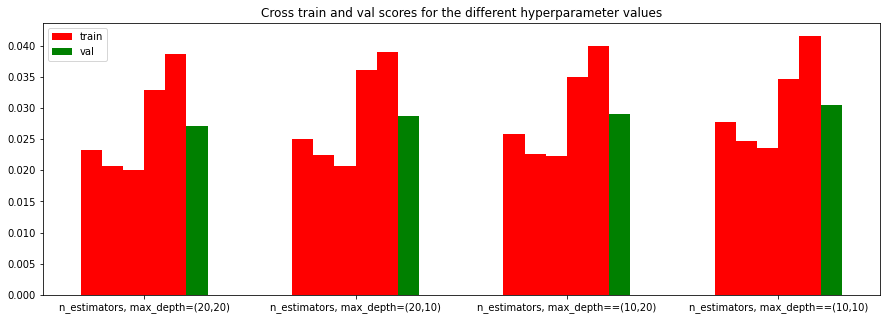

In [100]:
fig = plt.figure(figsize=(15,5))
X_axis = np.arange(4)
width = 0.1 # 0.125 # 0.14 # 0.16
for i, train_col_name in enumerate(train_col_names):
    plt.bar(X_axis+width*i, cv_results_rfr[train_col_name].values, label="train", color='r', width=width, align='center')
plt.bar(X_axis+width*5, cv_results_rfr[validation_col_name].values, label="val", color='g', width=width, align='center')
plt.xticks(X_axis+width*2.5, ["n_estimators, max_depth=(20,20)", "n_estimators, max_depth=(20,10)", "n_estimators, max_depth==(10,20)", "n_estimators, max_depth==(10,10)"])
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.title("Cross train and val scores for the different hyperparameter values")
plt.show()


## c

In [101]:
print(f"Best params : {gs_rfr.best_params_}")

Best params : {'max_depth': 20, 'n_estimators': 20}


In [102]:
print(f"MSE on the test set: {rmse(y_pred_rfr, y_test.values)}")
print(f"RMSE on the test set: {rmse(y_pred_rfr, y_test.values)**2}")

MSE on the test set: 1.409975955823703
RMSE on the test set: 1.988032196000965


## d

In [103]:
results_gs_rfr = pd.DataFrame({"coef": gs_rfr.best_estimator_.feature_importances_, "features": X_train.columns}).sort_values(by="coef", ascending=False).set_index("features")
results_gs_rfr

,coef
features,
hhsize,0.672545
poverty_index,0.093136
dirtfloor,0.090686
age_sp,0.054366
indigenous,0.050730
age_hh,0.013998
land,0.009931
educ_hh,0.006812
educ_sp,0.001692


In [104]:
# Variables for which the coef is very close to 0 ie :
# educ_hh, park, educ_sp, hospital_distance, female_hh, bathroom

# 5

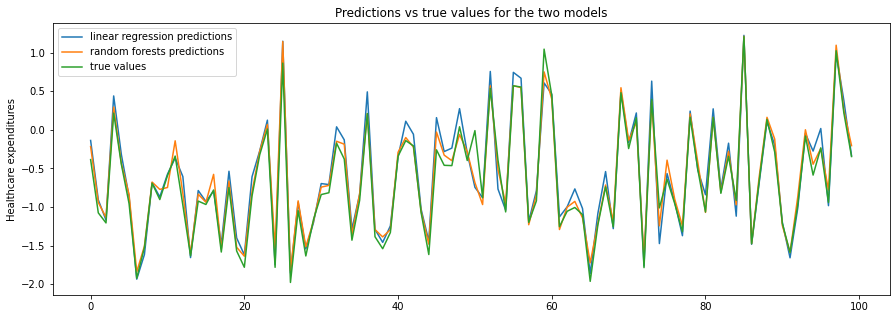

In [105]:
nb_obs = 100
sub_y_test = y_test.iloc[:nb_obs, :]
sub_y_pred_lin_reg, sub_y_pred_rfr = y_pred_lin_reg[:nb_obs], y_pred_rfr[:nb_obs]
# sub_y_pred_decision_tree = y_pred_decision_tree[:nb_obs]
# sub_y_pred_svr = y_pred_svr[:nb_obs]

plt.figure(figsize=(15,5))
plt.plot(sub_y_pred_lin_reg, label="linear regression predictions") # "o"
plt.plot(sub_y_pred_rfr, label="random forests predictions") # "o"
# plt.plot(sub_y_pred_decision_tree, label="decision tree predictions")
# plt.plot(sub_y_pred_svr, label="svr predictions")
plt.plot(sub_y_test.values, label="true values")
plt.ylabel("Healthcare expenditures")
plt.legend()
plt.title("Predictions vs true values for the two models")
plt.show()

In [106]:
print(f"RMSE for linear regression: {rmse(y_test.values, y_pred_lin_reg)}")
print(f"RMSE for random forests: {rmse(y_test.values, y_pred_rfr)}")
# print(f"RMSE for decision tree: {rmse(y_test.values, y_pred_decision_tree)}")
# print(f"RMSE for svr: {rmse(y_test.values, y_pred_svr)}")

RMSE for linear regression: 0.1951727085970667
RMSE for random forests: 1.409975955823703


In [107]:
# I conclude that linear regression is the model that best fit this data as the RMSE is equal to 0.195 whereas the RMSE for random forests is equal to 1.41 even after hyperparameters optimisation
# The ratio rmse(y_test.values, y_pred_lin_reg) / std(y_test) = 0.2 / 1 = 0.2 which means that linear regression model explains 80% of the variance of the data

# Appendix

### Decision Trees

In [108]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
decision_tree = DecisionTreeRegressor(criterion='mse', splitter='best', random_state=0)
decision_tree.fit(X_train, y_train)
# plot_tree(decision_tree);
# sum(decision_tree.feature_importances_)
print(decision_tree.tree_.max_depth)
print(decision_tree.tree_.node_count)

26
15791


In [109]:
results_decison_tree = pd.DataFrame({"coef": decision_tree.feature_importances_, "features": X_train.columns}).sort_values(by="coef", ascending=False).set_index("features")

### Grid Search

In [110]:
# from sklearn.metrics import make_scorer
# rmse_scorer = make_scorer(rmse, greater_is_better=False)

In [111]:
# Decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
parameters_decision_tree = {'max_depth': [10, 20], 'min_samples_split': [2, 5]}
decision_tree = DecisionTreeRegressor(criterion='mse', splitter='best', random_state=0)
gs_decision_tree = GridSearchCV(decision_tree, parameters_decision_tree, scoring='neg_mean_squared_error', cv=5, refit=True) # rmse_scorer # "neg_mean_squared_error" # mean_squared_error 
# gs_decision_tree.fit(X_train, y_train)
gs_decision_tree.fit(X_train.values, y_train.values)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(criterion='mse', random_state=0),
             param_grid={'max_depth': [10, 20], 'min_samples_split': [2, 5]},
             scoring='neg_mean_squared_error')

In [112]:
cv_results_decision_tree = pd.DataFrame(gs_decision_tree.cv_results_).sort_values("rank_test_score")
cv_results_decision_tree.iloc[:, 7:13] = cv_results_decision_tree.iloc[:, 7:13]*(-1)
cv_results_decision_tree

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.047140,0.001909,0.001061,0.000079,20,5,"{'max_depth': 20, 'min_samples_split': 5}",0.039355,0.037773,0.040826,0.052519,0.058649,0.045825,0.008258,1
2,0.053051,0.000450,0.001193,0.000141,20,2,"{'max_depth': 20, 'min_samples_split': 2}",0.036128,0.036730,0.042143,0.053243,0.062255,0.046100,0.010148,2
1,0.035448,0.000969,0.001001,0.000234,10,5,"{'max_depth': 10, 'min_samples_split': 5}",0.038401,0.036145,0.040088,0.055513,0.062532,0.046536,0.010509,3
0,0.037439,0.003720,0.000862,0.000065,10,2,"{'max_depth': 10, 'min_samples_split': 2}",0.039148,0.037022,0.040883,0.057320,0.064599,0.047794,0.011061,4


In [113]:
y_pred_decision_tree = gs_decision_tree.predict(X_test)
rmse(y_test.values, y_pred_decision_tree)

1.4200370495299974

In [114]:
# print(gs_decision_tree.scorer_)
# print(f"Best Score : {gs_decision_tree.score(X_test.values, y_test.values)*(-1)}")
print(f"MSE : {np.mean((y_test.values-y_pred_decision_tree)**2)}")
print(f"RMSE : {rmse(y_test.values, y_pred_decision_tree)}")

MSE : 2.0165052220378605
RMSE : 1.4200370495299974


### SVR

In [115]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf', degree=3, gamma='scale', C=1.0)
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
rmse(y_test.values, y_pred_svr)

1.409158865145035

### Grid Search

In [116]:
# SVR 
from sklearn.model_selection import GridSearchCV
parameters_svr = {'kernel': ['linear', 'rbf'], 'C': [0.5, 1, 10]} # 4m39 # 3 kernel + 2 degree + 3 C => too long 
svr = SVR(gamma='scale')
gs_svr = GridSearchCV(svr, parameters_svr, scoring='neg_mean_squared_error', cv=5, refit=True) # rmse_scorer # "neg_mean_squared_error" # mean_squared_error 
# gs_svr.fit(X_train, y_train)
gs_svr.fit(X_train.values, y_train.values)

In [ ]:
cv_results_svr = pd.DataFrame(gs_svr.cv_results_).sort_values("rank_test_score")
cv_results_svr.iloc[:, 7:13] = cv_results_svr.iloc[:, 7:13]*(-1)
cv_results_svr

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,1.535946,0.074050,0.150297,0.057668,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.018669,0.015587,0.016648,0.030723,0.031795,0.022684,0.007079,1
5,5.756455,0.373309,0.141747,0.036913,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.018432,0.017459,0.017124,0.028491,0.032329,0.022767,0.006372,2
1,1.491777,0.329375,0.164956,0.044025,0.5,rbf,"{'C': 0.5, 'kernel': 'rbf'}",0.020050,0.016713,0.018397,0.036084,0.037499,0.025749,0.009089,3
4,76.568407,7.283268,0.090952,0.011439,10,linear,"{'C': 10, 'kernel': 'linear'}",0.030804,0.029499,0.027382,0.059253,0.053633,0.040114,0.013495,4
2,13.403911,1.312275,0.091716,0.010736,1,linear,"{'C': 1, 'kernel': 'linear'}",0.030804,0.029490,0.027368,0.059271,0.053641,0.040115,0.013505,5
0,6.776870,1.024660,0.088059,0.012993,0.5,linear,"{'C': 0.5, 'kernel': 'linear'}",0.030808,0.029490,0.027386,0.059289,0.053650,0.040125,0.013508,6


In [ ]:
print(f"Best params : {gs_svr.best_params_}")

Best params : {'C': 1, 'kernel': 'rbf'}


In [ ]:
y_pred_svr = gs_svr.predict(X_test)
rmse(y_test.values, y_pred_svr)

1.4091588651439946